In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
import matplotlib.pylab as plt

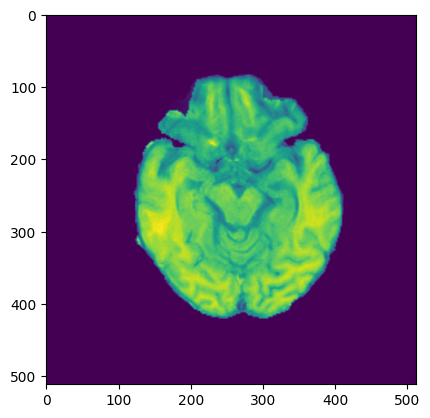

In [6]:
image_path = '/Users/aryansharma/Downloads/myimage.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

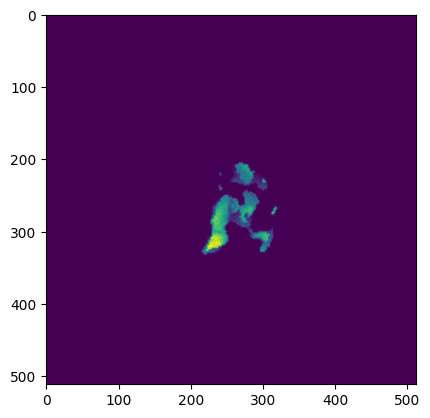

In [12]:
image_path = '/Users/aryansharma/Downloads/Image-29.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

In [14]:
def augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)
        
    return image

In [16]:
data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = augment)
# set as training data

train_gen  = data.flow_from_directory(
    "/Users/aryansharma/WassersteinGAN/braindata",
    target_size=(224, 224),
    batch_size = 16,
    color_mode = 'rgb',
    shuffle = True,
    class_mode='binary',
    subset='training') 

# same directory as training data

valid_gen  = data.flow_from_directory(
    "/Users/aryansharma/WassersteinGAN/braindata",
    target_size=(224, 224),
    batch_size = 16,
    color_mode = 'rgb',
    shuffle = False,
    class_mode='binary',
    subset='validation')

Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


In [20]:
imgs = os.listdir('/Users/aryansharma/WassersteinGAN/braindata')
images = np.zeros(shape=(len(imgs), 224, 224, 3))
i = 0
for img in imgs:
    images[i] = cv2.imread(img)
    i += 1

print(images.shape)

TypeError: array() got an unexpected keyword argument 'size'